# Image Classification - Cats & Dogs


### AIM - Weekend Hackathon : 11

https://www.machinehack.com/hackathons/5f05b7e78842ae057f62ece5


**Overview**


In this hackathon, you will be provided with images of cats and dogs and you must use  your Computer Vision skills to build an image classifier to classify an image as that of a dog or of a cat. In this supervised image classification task, your goal is to classify the images into their respective classes using accuracy as a metric. The Dogs vs Cats is a classic dataset and has been used to train and evaluate models for binary classification tasks. With today's State-of-the-art Computer Vision models, we expect all the participants to achieve an accuracy of more than 90%.

**Data :**

Train (Folder): contains 9471 images of cats and dogs
Test (Folder): contains 4059 images of cats and dogs
Sample_Submission.csv : The format of submission accepted
Train.csv : contains the file name and appropriate category for each image in the train data
Test.csv : contains the file name for each image in the test data


*References*

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html



In [57]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import shutil 
import os
print(os.listdir("../Data"))

['.DS_Store', '.ipynb_checkpoints', 'ImageClassification_AIM_Hackathon#11.ipynb', 'ImageClassification_Cats_Dogs_AIM_Hackathon#11.ipynb', 'model_cats_dogs.h5', 'Sample_Submission.csv', 'submission_v1.csv', 'Test', 'Train', 'Train.csv']


In [53]:
print("numpy version: ",np.__version__)
print("pandas version: ",pd.__version__)
#print("matplotlib version: ",matplotlib.__version__)
#print("keras version: ",keras.preprocessing.image.__version__)
#print("scikit version: ",sklearn.__version__)

numpy version:  1.18.4
pandas version:  0.25.1


In [54]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
folder = '../Data/Train/Labeled_Images'
if not os.path.exists(folder):
    os.makedirs(folder)
    
dataset_path_final = folder    

In [5]:
dog_dataset_path_initial = "../Data/Train/Dogs/"

for count,filename in enumerate(os.listdir(dog_dataset_path_initial)): 
    #dst = "dog." + filename
    source = dog_dataset_path_initial + filename 
    destination = dataset_path_final + "dog." + filename
    #os.rename(source, destination) 
    
    try: 
        shutil.copyfile(source, destination) 
        print("File copied successfully.") 
  
# If source and destination are same 
    except shutil.SameFileError: 
        print("Source and destination represents the same file.") 
  
# If destination is a directory. 
    except IsADirectoryError: 
        print("Destination is a directory.") 
  
# If there is any permission issue 
    except PermissionError: 
        print("Permission denied.") 
  
# For other errors 
    except: 
        print("Error occurred while copying file.") 

In [6]:
cat_dataset_path_initial = "../Data/Train/Cats/"

for count,filename in enumerate(os.listdir(cat_dataset_path_initial)): 
    #dst = "cat." + filename
    source = cat_dataset_path_initial + filename 
    destination = dataset_path_final + "cat." + filename 
    #os.rename(source, destination) 
    
    try: 
        shutil.copyfile(source, destination) 
        print("File copied successfully.") 
  
# If source and destination are same 
    except shutil.SameFileError: 
        print("Source and destination represents the same file.") 
  
# If destination is a directory. 
    except IsADirectoryError: 
        print("Destination is a directory.") 
  
# If there is any permission issue 
    except PermissionError: 
        print("Permission denied.") 
  
# For other errors 
    except: 
        print("Error occurred while copying file.") 

In [7]:
filenames = os.listdir(dataset_path_final)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [8]:
df.head()

,filename,category
0,cat.10002.jpg,0
1,cat.10004.jpg,0
2,cat.10006.jpg,0
3,cat.10010.jpg,0
4,cat.10015.jpg,0


In [9]:
df.tail()

,filename,category
9466,dog.9964.jpg,1
9467,dog.997.jpg,1
9468,dog.9974.jpg,1
9469,dog.9982.jpg,1
9470,dog.999.jpg,1


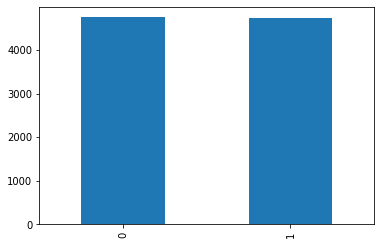

In [10]:
df['category'].value_counts().plot.bar()

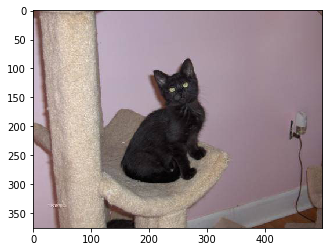

In [12]:
sample = random.choice(filenames)
image = load_img("../Data/Train/Labeled_Images/"+sample)
plt.imshow(image)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [14]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [15]:
earlystop = EarlyStopping(patience=10)

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
callbacks = [earlystop, learning_rate_reduction]

In [18]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [19]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

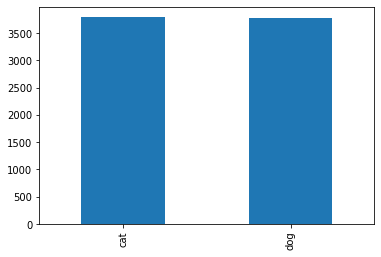

In [20]:
train_df['category'].value_counts().plot.bar()

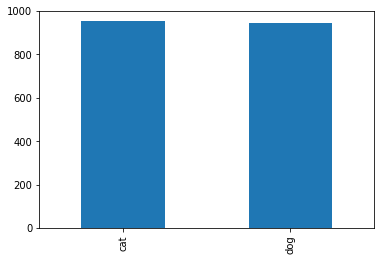

In [21]:
validate_df['category'].value_counts().plot.bar()

In [22]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [23]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 7576 validated image filenames belonging to 2 classes.


In [24]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1895 validated image filenames belonging to 2 classes.


In [55]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


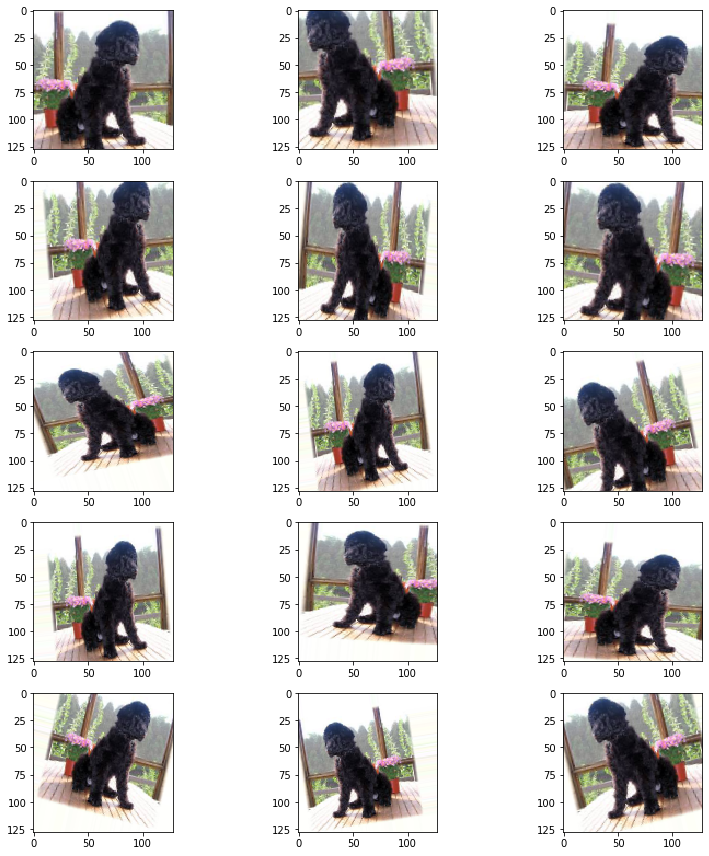

In [56]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [31]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
505/505 [==============================] - 435s 861ms/step - loss: 0.7486 - accuracy: 0.6081 - val_loss: 0.8525 - val_accuracy: 0.5688 - lr: 0.0010
Epoch 2/50
505/505 [==============================] - 438s 867ms/step - loss: 0.6247 - accuracy: 0.6613 - val_loss: 0.6238 - val_accuracy: 0.6937 - lr: 0.0010
Epoch 3/50
505/505 [==============================] - 959s 2s/step - loss: 0.5726 - accuracy: 0.7102 - val_loss: 0.5239 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 4/50
505/505 [==============================] - 434s 860ms/step - loss: 0.5460 - accuracy: 0.7266 - val_loss: 0.5134 - val_accuracy: 0.7593 - lr: 0.0010
Epoch 5/50
505/505 [==============================] - 453s 897ms/step - loss: 0.5354 - accuracy: 0.7422 - val_loss: 0.5791 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 6/50
505/505 [==============================] - 440s 871ms/step - loss: 0.5069 - accuracy: 0.7494 - val_loss: 0.5557 - val_accuracy: 0.7698 - lr: 0.0010
Epoch 7/50
505/505 [=============================

505/505 [==============================] - 378s 748ms/step - loss: 0.3768 - accuracy: 0.8372 - val_loss: 0.3050 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 22/50
505/505 [==============================] - 374s 741ms/step - loss: 0.3723 - accuracy: 0.8349 - val_loss: 0.4005 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 23/50
505/505 [==============================] - 401s 795ms/step - loss: 0.3701 - accuracy: 0.8355 - val_loss: 0.4015 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 24/50
505/505 [==============================] - 397s 785ms/step - loss: 0.3617 - accuracy: 0.8396 - val_loss: 0.3474 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 25/50
505/505 [==============================] - 383s 758ms/step - loss: 0.3542 - accuracy: 0.8437 - val_loss: 0.2981 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 26/50
505/505 [==============================] - 394s 781ms/step - loss: 0.3537 - accuracy: 0.8471 - val_loss: 0.3570 - val_accuracy: 0.8497 - lr: 0.0010
Epoch 27/50
505/505 [==============================]

In [33]:
model.save_weights("model_cats_dogs.h5")

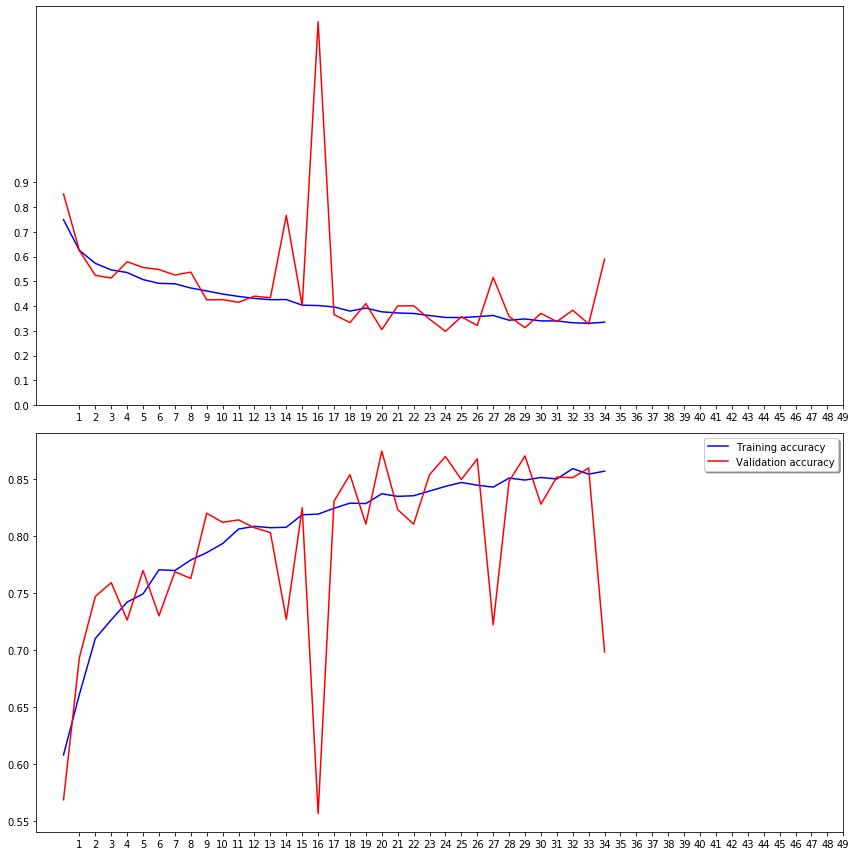

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [35]:
test_filenames = os.listdir("../Data/Test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [36]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../Data/Test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 4059 validated image filenames.


In [37]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [38]:
test_df['category'] = np.argmax(predict, axis=-1)

In [39]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [40]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

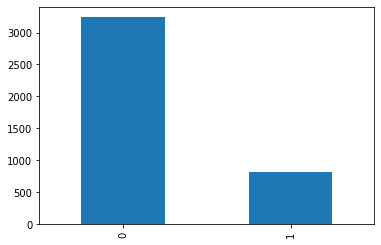

In [41]:
test_df['category'].value_counts().plot.bar()

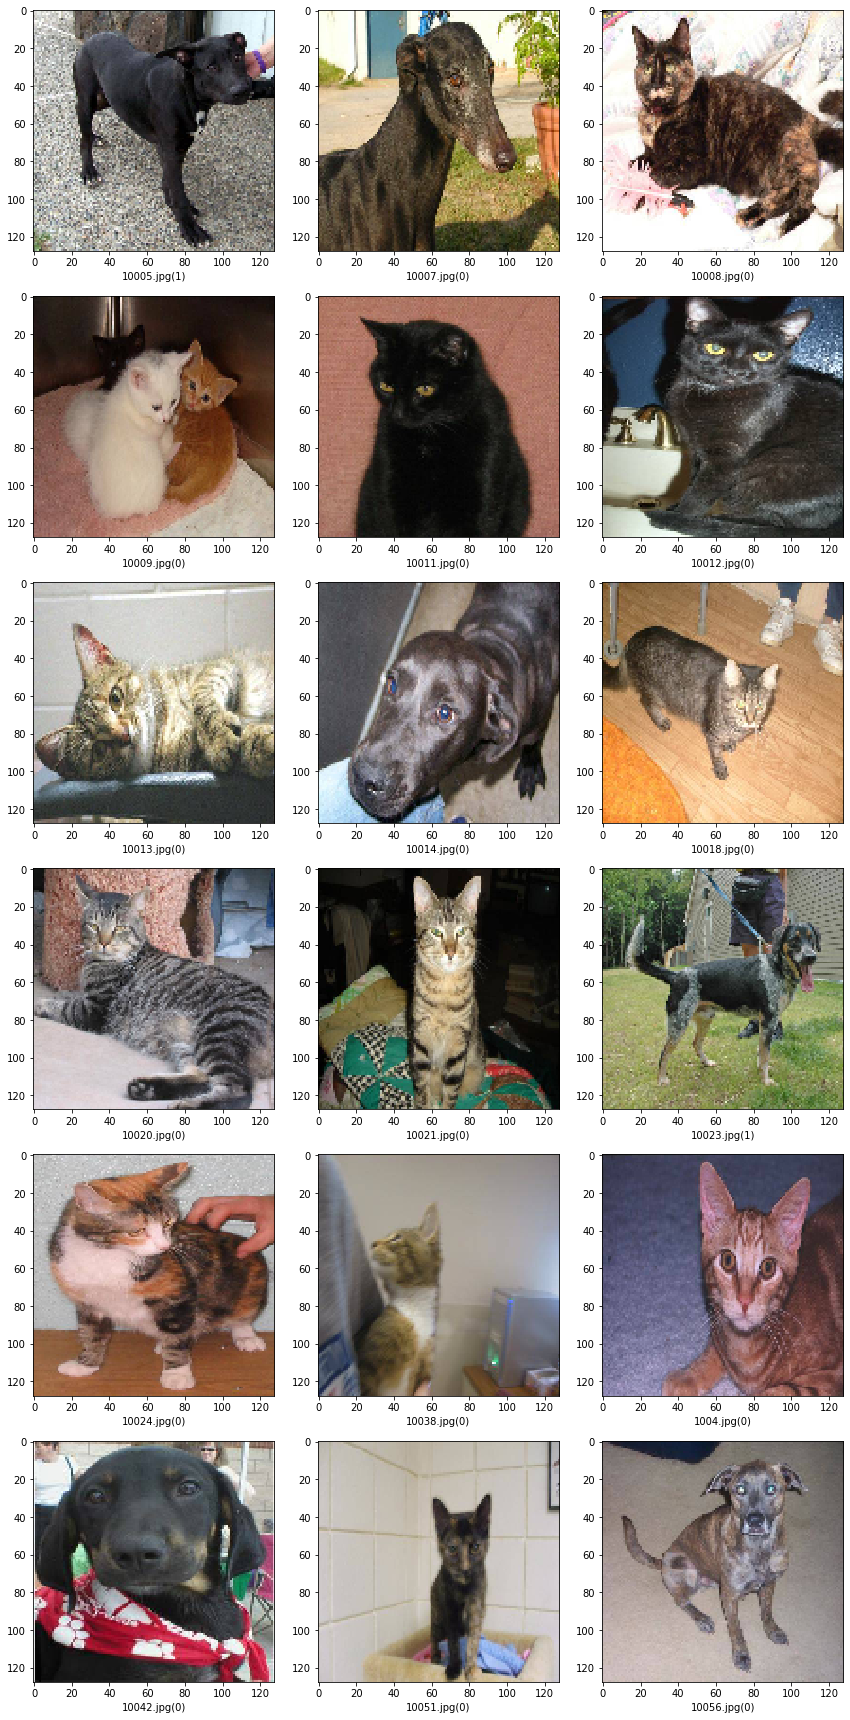

In [42]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../Data/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [44]:
submission_df = test_df.copy()
#submission_df['File_Name'] = submission_df['filename'].str.split('.').str[0]
submission_df['File_Name'] = submission_df['filename']
submission_df['Category'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_v1.csv', index=False)